# Calfornia Housing Price Prediction

## Problem Statement

To Predict the prices of houses in Californa based on their different specifications and locations.

## Description

The Dataset is built using the 1990 California census data. 
It contains one row per census block group. 
A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The information was collected on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. Distances were computed among the centroids of each block group as measured in latitude and longitude and all the districts reporting zero entries for the independent and dependent variables were excluded.  



In [118]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt


In [96]:
housing_data=pd.read_csv("https://raw.githubusercontent.com/decodrtechnologies/Data-Science/master/California%20Housing%20Prices/housing.csv")


## Data Description

The data contained 20,640 observations on 10 variables.


In [97]:
housing_data.shape

(20640, 10)

The dependent or target variable is ln(median house value).

The independent variables are as follows:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea


In [98]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

**Below are few samples of our dataset.**

In [99]:
housing_data.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [100]:
housing_data.describe(include ='all').T

count unique        top  freq     mean      std     min  \
longitude           20640    NaN        NaN   NaN  -119.57  2.00353 -124.35   
latitude            20640    NaN        NaN   NaN  35.6319  2.13595   32.54   
housing_median_age  20640    NaN        NaN   NaN  28.6395  12.5856       1   
total_rooms         20640    NaN        NaN   NaN  2635.76  2181.62       2   
total_bedrooms      20433    NaN        NaN   NaN  537.871  421.385       1   
population          20640    NaN        NaN   NaN  1425.48  1132.46       3   
households          20640    NaN        NaN   NaN   499.54   382.33       1   
median_income       20640    NaN        NaN   NaN  3.87067  1.89982  0.4999   
median_house_value  20640    NaN        NaN   NaN   206856   115396   14999   
ocean_proximity     20640      5  <1H OCEAN  9136      NaN      NaN     NaN   

                        25%     50%      75%      max  
longitude            -121.8 -118.49  -118.01  -114.31  
latitude              33.93   34.26    37.71    41.95  
housing_median_age       18      29       37       52  
total_rooms         1447.75    2127     3148    39320  
total_bedrooms          296     435      647     6445  
population              787    1166     1725    35682  
households              280     409      605     6082  
median_income        2.5634  3.5348  4.74325  15.0001  
median_house_value   119600  179700   264725   500001  
ocean_proximity         NaN     NaN      NaN      NaN

From the above table we can see that there is no missing values in our dataset as count for all variable is same as the shape of the dataset.

1. longitude minimum value is -124.35 and maximum value is -114.31.
1. latitude minimum value is 32.54 and maximum value is 41.95.
3. minimum housing median age is 1 i.e there will be house which built in the last year and maximum housing median age is 52
4. In california there are house having 2 to 39320 rooms.
5. In california there are house having 1 to 6445 bedrooms.
6. housing Population is from 3 to 35682 and average population of house in california is 1425.
7. Average household is 499.54.
8. median income is from 4999 us dollar to 150001 us dollar and average median income is 38706.7 us dollar.
9. Average median house value is 206856 us dollar. and the range of median house value is from 14999 us dollar to 500001 us dollar.
10. There are 5 unique values in ocean proximitiy and  maximum values are less than 1 hour from ocean.



## Exploratory Data Analysis

### Univariate Analysis

we will look statistic summary of each variable of our dataset.

below are distribution of all the attribute.

In [144]:


fig = make_subplots(rows=5, cols=2,row_heights =[40,30,30,20,30])


longitude = go.Histogram(x=housing_data['longitude'],name='longitude')
latitude = go.Histogram(x=housing_data['latitude'],name='latitude')
housing_median_age = go.Histogram(x=housing_data['housing_median_age'],name='housing_median_age')
total_rooms = go.Histogram(x=housing_data['total_rooms'],name='total_rooms')
total_bedrooms= go.Histogram(x=housing_data['total_bedrooms'],name='total_bedrooms')
population = go.Histogram(x=housing_data['population'],name='population')
households = go.Histogram(x=housing_data['households'],name='households')
median_income = go.Histogram(x=housing_data['median_income'],name='median_income')
median_house_value = go.Histogram(x=housing_data['median_house_value'],name='median_house_value')
ocean_proximity = go.Histogram(x=housing_data['ocean_proximity'],name='ocean_proximity')


fig.append_trace(longitude, 1, 1)
fig.append_trace(longitude, 1, 2)
fig.append_trace(housing_median_age, 2, 1)
fig.append_trace(total_rooms, 2, 2)
fig.append_trace(total_bedrooms, 3, 1)
fig.append_trace(population, 3, 2)
fig.append_trace(households, 4, 1)
fig.append_trace(median_income, 4, 2)
fig.append_trace(median_house_value, 5, 1)
fig.append_trace(ocean_proximity, 5, 2)

fig.show()

From the above table we see which value has highest distribution or maximum number of sample. 

like In Ocean Proximity there are 5 unique value and there are 9136 samples with <1H OCEAN, 6551 samples with INLAND, 2658 samples of NEAR OCEAN, 2290 samples of NEAR BAY and 5 samples of ISLAND.

#### OUTLIERS

##### Longitude

50% of longitude lies between -118 degree to -122 degree


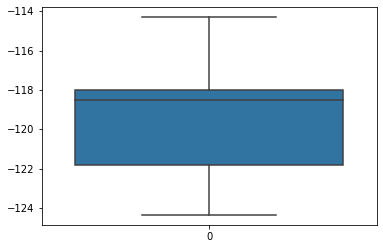

In [102]:
sns.boxplot(data=housing_data['longitude'])

##### Latitude

50% of latitude lies between 34 degree to 38 degree.

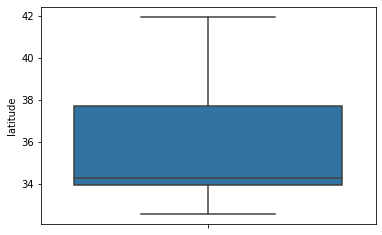

In [103]:
sns.boxplot(y=housing_data['latitude'])

##### housing_median_age

50% of median age of house within a block lies between 20 to 40.


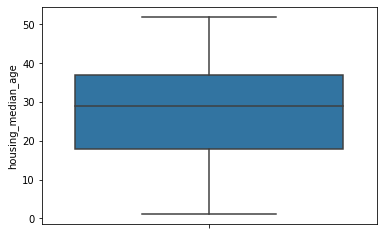

In [104]:
sns.boxplot(y=housing_data['housing_median_age'],)
#housing_data.plot(y='housing_median_age', kind='box')

In [105]:
##### total_rooms

50% of median age of house within a block lies between 20 to 40.


SyntaxError: invalid syntax (<ipython-input-105-88e44903bd94>, line 3)

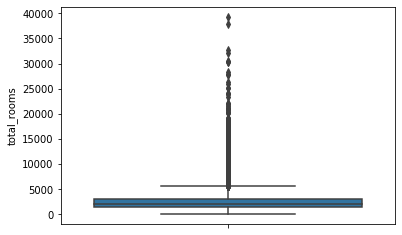

In [106]:
sns.boxplot(y=housing_data['total_rooms'])
#housing_data.plot(y='total_rooms', kind='box')

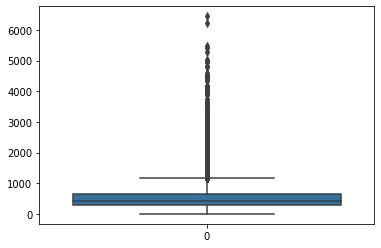

In [107]:
sns.boxplot(data=housing_data['total_bedrooms'])

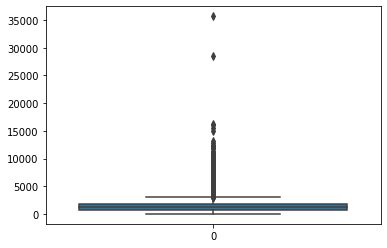

In [108]:
sns.boxplot(data=housing_data['population'])

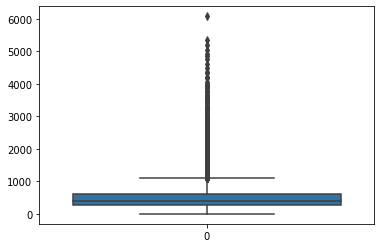

In [109]:
sns.boxplot(data=housing_data['households'],)

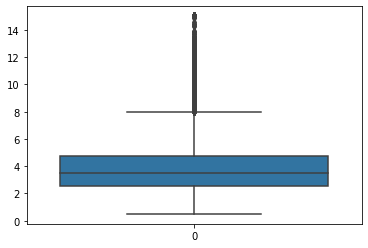

In [110]:
sns.boxplot(data=housing_data['median_income'])

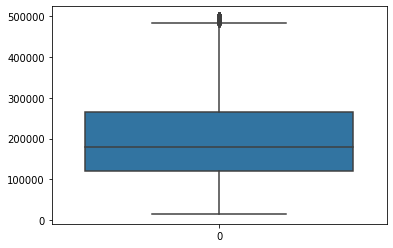

In [111]:
sns.boxplot(data=housing_data['median_house_value'])

#### Bivariate Analysis

##### Correlation matrix of the dataset

In [146]:
housing_data.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

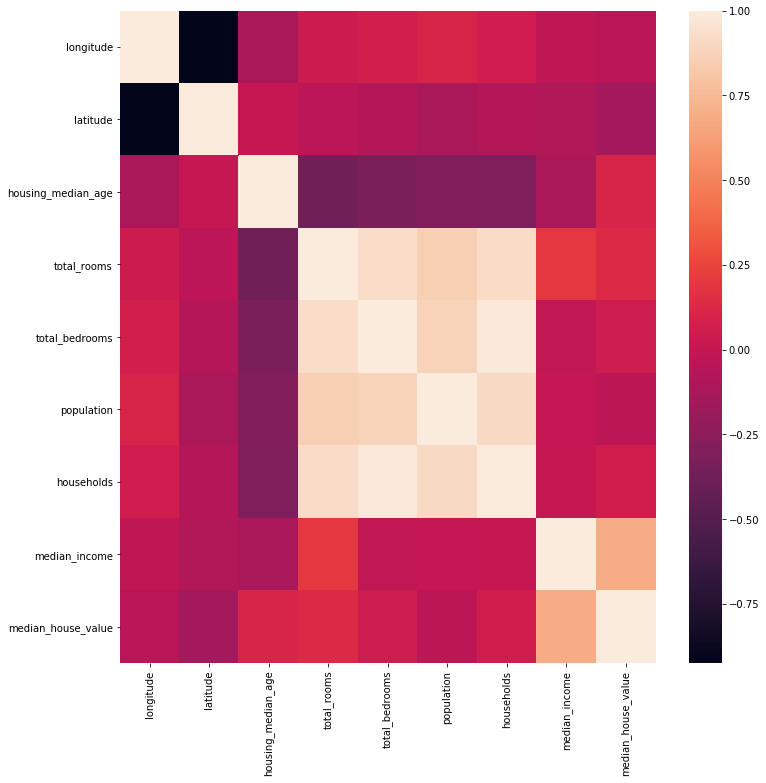

In [147]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(housing_data.corr())

from the above table and graph we can conclude that :

**Lattitude and Longitude** has high coorelation value (-0.92).

Similarly **total rooms** is  highly correlated with total bedrooms(0.93), population(0.85) and households(0.91).

**total bedrooms** are highly correlated with population(0.87)	and households(0.97).

**population** is highly corelated with households(0.97).


* From Data Preprocessing point of view we can also infer that total rooms, total bedrooms, population and household are highly correlated so they carry almost same information so we will take only one atturibute and we can delete rest of the three attributes. So we can take only total rooms and delete total bedrooms, population and households attribute.
* Lattitude and Longitude is also highly corelated but by the use of both we can get exact location so we can't delete any of the variables.

#### Longitude vs Latitude


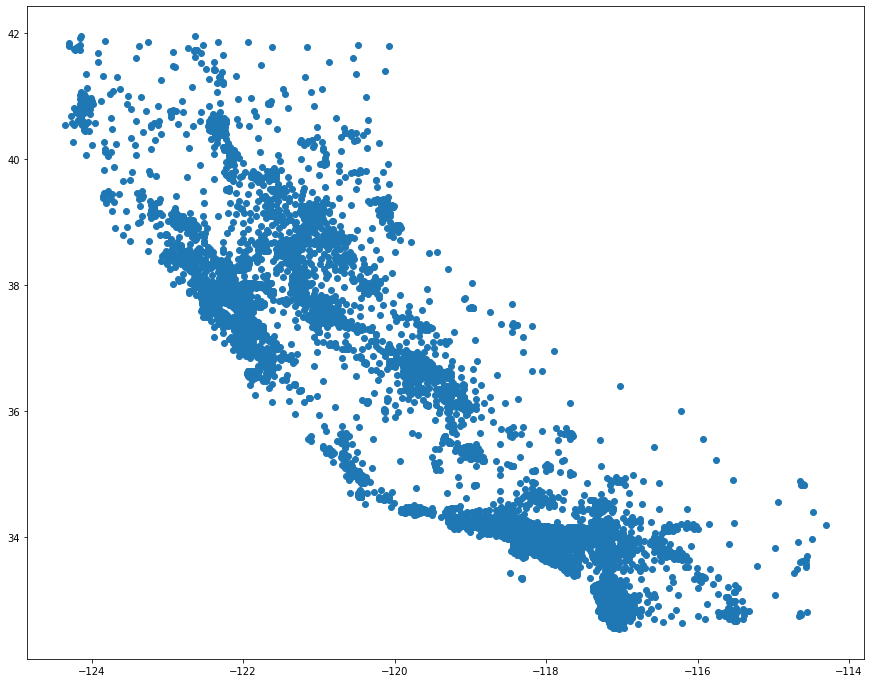

In [153]:
plt.figure(figsize = (15,12))
plt.scatter(x=housing_data['longitude'],y=housing_data['latitude'])

From the above graph we can visualize location of dataset.

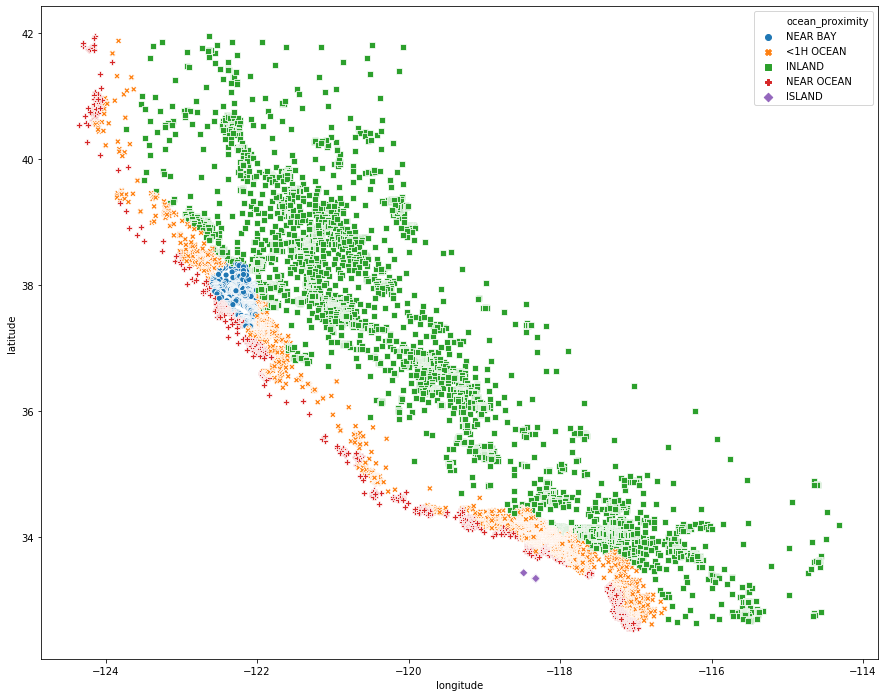

In [197]:
plt.figure(figsize = (15,12))
sns.scatterplot(x='longitude',y='latitude',data=housing_data, hue='ocean_proximity', style='ocean_proximity')

From the above plot we ploted the location with ocean proximity and color them in different.
So we can infer that left side of the graph where location shows in red color has ocean and right side where location is shown is green colour are land area.

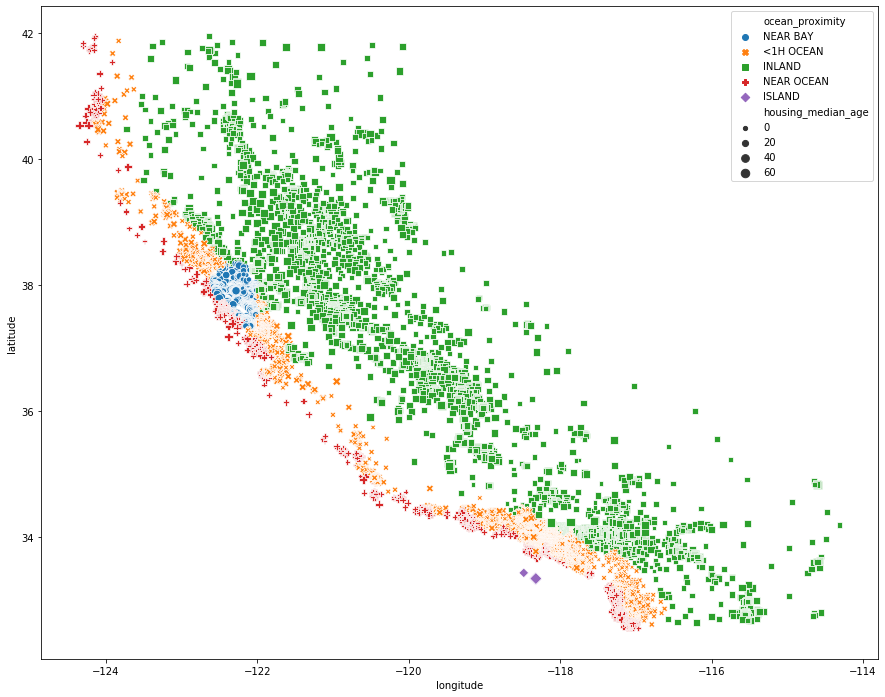

In [200]:
plt.figure(figsize = (15,12))
sns.scatterplot(x='longitude',y='latitude',data=housing_data, hue='ocean_proximity',  style='ocean_proximity',size='housing_median_age')

In the above plot we can also see housing_median_age with loaction and ocean proximity.

##### Total rooms vs Median Income

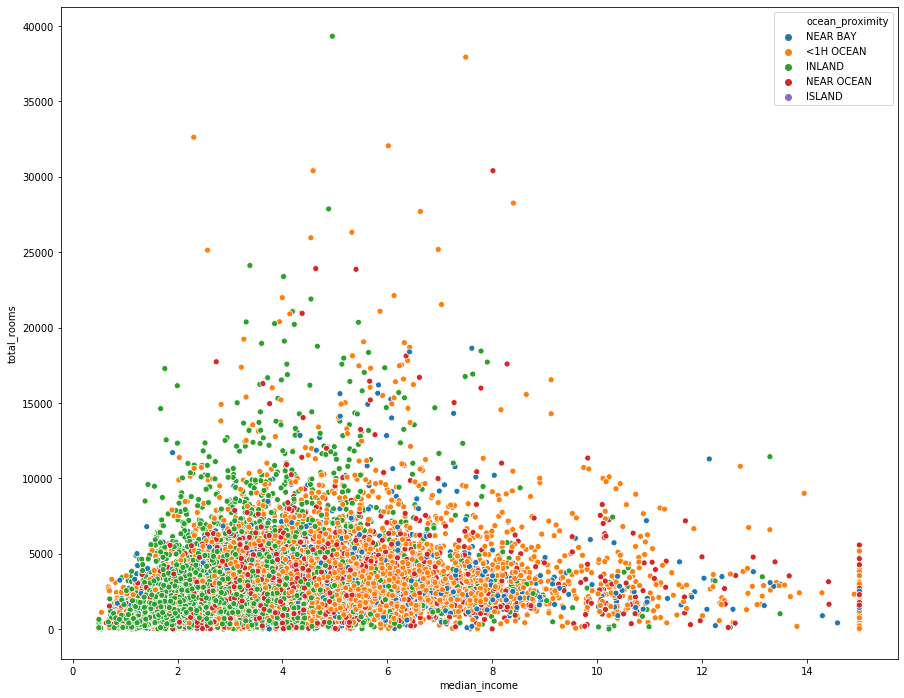

In [182]:
plt.figure(figsize = (15,12))
sns.scatterplot(y='total_rooms',x='median_income',data=housing_data,hue='ocean_proximity')

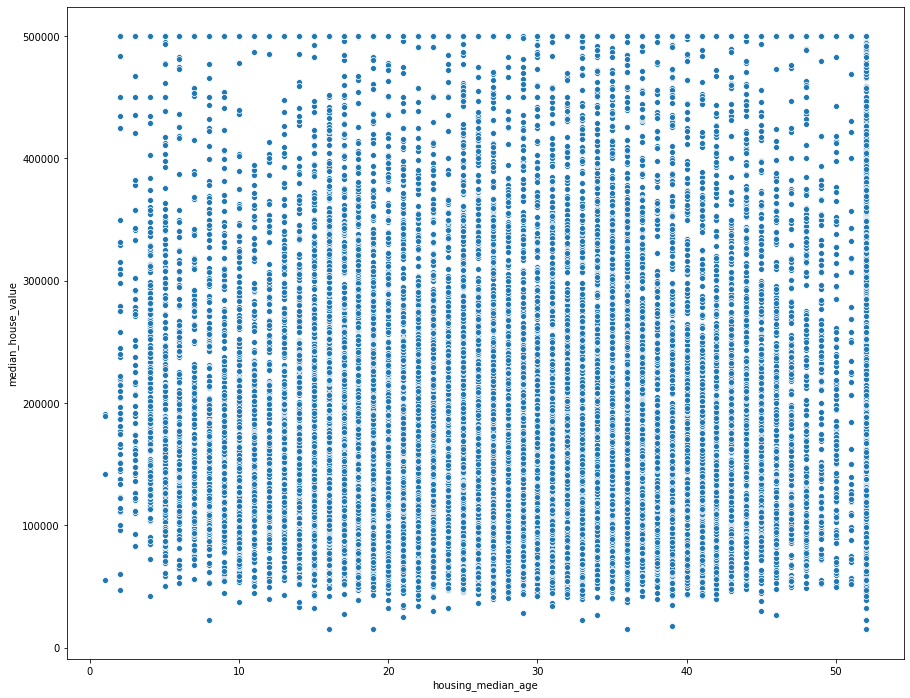

In [194]:
plt.figure(figsize = (15,12))
sns.scatterplot(x='housing_median_age',y='median_house_value',data=housing_data)

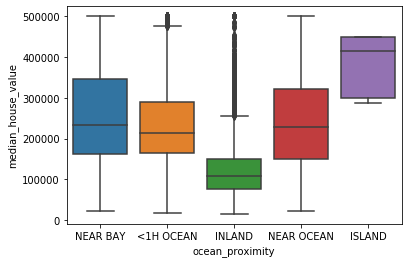

In [186]:
sns.boxplot(x='ocean_proximity',y='median_house_value',data=housing_data)

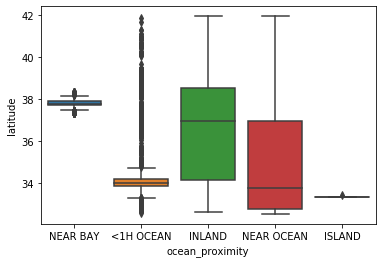

In [187]:
sns.boxplot(x='ocean_proximity',y='latitude',data=housing_data)

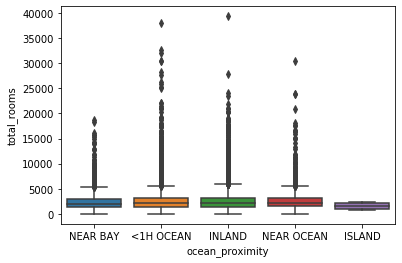

In [189]:
sns.boxplot(x='ocean_proximity',y='total_rooms',data=housing_data)